ЧАСТЬ 1. ПАРСИНГ

In [ ]:
from bs4 import BeautifulSoup
import requests                   # Библиотека для отправки запросов
import numpy as np
import pandas as pd
import time                       # Библиотека для времени
from tqdm import tqdm_notebook
from tqdm import tqdm
from sklearn.metrics import *

In [ ]:
!pip install fake_useragent

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 489.7 kB/s eta 0:00:00


In [ ]:
# подгрузим один из методов этой библиотеки
from fake_useragent import UserAgent

In [ ]:
page_link = 'https://www.litres.ru/popular/?page=1'
# page_link = 'https://www.kinopoisk.ru/lists/movies/year--2022/?ss_subscription=ANY&page=1'

In [ ]:
UserAgent().chrome

'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/535.2 (KHTML, like Gecko) Ubuntu/11.04 Chromium/15.0.871.0 Chrome/15.0.871.0 Safari/535.2'

In [ ]:
response = requests.get(page_link, headers={'User-Agent': UserAgent().chrome})
response

<Response [200]>

In [ ]:
html = response.content

In [ ]:
html[:1000]

b'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN" "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">\n<html lang="ru" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><meta charset="utf-8" /><title>\xd0\x9b\xd1\x83\xd1\x87\xd1\x88\xd0\xb8\xd0\xb5 \xd0\xba\xd0\xbd\xd0\xb8\xd0\xb3\xd0\xb8 2023 \xd1\x87\xd0\xb8\xd1\x82\xd0\xb0\xd1\x82\xd1\x8c \xd0\xbe\xd0\xbd\xd0\xbb\xd0\xb0\xd0\xb9\xd0\xbd \xd0\xb1\xd0\xb5\xd1\x81\xd0\xbf\xd0\xbb\xd0\xb0\xd1\x82\xd0\xbd\xd0\xbe \xd0\xb8\xd0\xbb\xd0\xb8 \xd1\x81\xd0\xba\xd0\xb0\xd1\x87\xd0\xb0\xd1\x82\xd1\x8c \xd0\xb2 fb2</title><meta name="description" content="\xd0\xad\xd0\xbb\xd0\xb5\xd0\xba\xd1\x82\xd1\x80\xd0\xbe\xd0\xbd\xd0\xbd\xd0\xb0\xd1\x8f \xd0\xb1\xd0\xb8\xd0\xb1\xd0\xbb\xd0\xb8\xd0\xbe\xd1\x82\xd0\xb5\xd0\xba\xd0\xb0 \xd0\x9b\xd0\xb8\xd1\x82\xd1\x80\xd0\xb5\xd1\x81 \xd0\xbf\xd1\x80\xd0\xb5\xd0\xb4\xd0\xbb\xd0\xb0\xd0\xb3\xd0\xb0\xd0\xb5\xd1\x

In [ ]:
len(html)

258204

In [ ]:
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
print(soup)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN" "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">

<html lang="ru" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta charset="utf-8"><title>Лучшие книги 2023 читать онлайн бесплатно или скачать в fb2</title><meta content="Электронная библиотека Литрес предлагает скачать книги📚 в fb2, epub, txt, pdf или читать онлайн бесплатно. Лучшие книги, популярные авторы, оценки и отзывы." name="description"/><link href="https://www.litres.ru/luchshie-knigi/" hreflang="ru" rel="alternate"/><link href="https://litres.com/the-best-books/" hreflang="en" rel="alternate"/><link href="https://litres.pl/najlepsze-ksiazki/" hreflang="pl" rel="alternate"/><link href="https://litres.ee/populaarsed/" hreflang="et" rel="alternate"/><link href="https://litres.de/beliebt/" hreflang="de" rel="alternate"/><link href="https://litres.az/luchshie-knigi/" hreflan

In [ ]:
print(soup.prettify()[:2000])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN" "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">
<html lang="ru" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta charset="utf-8">
   <title>
    Лучшие книги 2023 читать онлайн бесплатно или скачать в fb2
   </title>
   <meta content="Электронная библиотека Литрес предлагает скачать книги📚 в fb2, epub, txt, pdf или читать онлайн бесплатно. Лучшие книги, популярные авторы, оценки и отзывы." name="description"/>
   <link href="https://www.litres.ru/luchshie-knigi/" hreflang="ru" rel="alternate"/>
   <link href="https://litres.com/the-best-books/" hreflang="en" rel="alternate"/>
   <link href="https://litres.pl/najlepsze-ksiazki/" hreflang="pl" rel="alternate"/>
   <link href="https://litres.ee/populaarsed/" hreflang="et" rel="alternate"/>
   <link href="https://litres.de/beliebt/" hreflang="de" rel="alternate"/>
   <link 

In [ ]:
soup.findAll('a', {'class':'img-a'})[0].get('href')

'/book/elena-mihalkova/mertvyy-krolik-zhivoy-krolik-69299137/'

In [ ]:
books_links = soup.findAll(lambda tag: tag.name == 'a' and tag.get('class') == ['img-a'])
books_links[:3]

[<a class="img-a" data-art="69299137" data-available="1" data-freebie="0" data-purchased="0" data-type="elektronnaya-kniga" data-type-clickhouse="text" height="270" href="/book/elena-mihalkova/mertvyy-krolik-zhivoy-krolik-69299137/" width="170"><div class="processingImage" data-alt="Мертвый кролик, живой кролик"><div class="round-loader" style="width: 170px; height: 270px;"><div class="round-loader__progress"></div></div></div><span class="art-line-separator"></span></a>,
 <a class="img-a" data-art="65834170" data-available="1" data-freebie="0" data-purchased="0" data-type="audiokniga" data-type-clickhouse="audio" height="270" href="/audiobook/patrik-king/chitayte-ludey-kak-knigu-kak-analizirovat-ponimat-i-predskazyv-65834170/" width="192"><div class="processingImage" data-alt="Читайте людей как книгу. Как анализировать, понимать и предсказывать эмоции, мысли, намерения и поведение людей" data-discount="70"><div class="round-loader" style="width: 192px; height: 270px;"><div class="roun

In [ ]:
len(books_links)

40

In [ ]:
books_links = [link.attrs['href'] for link in books_links]

In [ ]:
books_links

['/book/elena-mihalkova/mertvyy-krolik-zhivoy-krolik-69299137/',
 '/audiobook/patrik-king/chitayte-ludey-kak-knigu-kak-analizirovat-ponimat-i-predskazyv-65834170/',
 '/book/anne-dar/rodnaya-krov-67066479/',
 '/book/andrey-vasilev-4/legkiy-zakaz-69414214/',
 '/book/dmitriy-petrov-31817282/zhiloy-kompleks-kuricyn-68807766/',
 '/book/marina-surzhevskaya-22364624/sovershennye-68928894/',
 '/book/aleksandra-marinina/tma-posle-rassveta-68708631/',
 '/book/anne-dar/odin-god-zhizni-67259720/',
 '/book/artem-kamenistyy/zabytye-teni-alfa-7-69275926/',
 '/book/tatyana-ustinova/scenarii-sudby-tonechki-morozovoy-69446647/',
 '/audiobook/roman-urevich-prokofev/zvezdnaya-krov-3-zemli-teney-69455644/',
 '/book/erofey-trofimov/lesnoy-gambit-69324979/',
 '/book/anil-set/byt-soboy-novaya-teoriya-soznaniya-69284665/',
 '/book/edit-eva-eger/vybor-o-svobode-i-vnutrenney-sile-cheloveka-48508375/',
 '/book/dzheyms-klir/atomnye-privychki-kak-priobresti-horoshie-privychki-i-izbavit-48514275/',
 '/audiobook/bori

Для начала пройдемся по главной странице и соберем ссылки на популярные книги

In [ ]:
def getPageLinks(page_number):

    # составляем ссылку на страницу поиска
    page_link = 'https://www.litres.ru/popular/?page={}'.format(page_number)

    # запрашиваем данные по ней
    response = requests.get(page_link, headers={'User-Agent': UserAgent().chrome})

    if not response.ok:
        # если сервер нам отказал, вернем пустой лист для текущей страницы
        return []

    # получаем содержимое страницы и переводим в суп
    html = response.content
    soup = BeautifulSoup(html,'html.parser')

    # наконец, ищем ссылки и очищаем их от ненужных тэгов
    books_links = soup.findAll(lambda tag: tag.name == 'a' and tag.get('class') == ['img-a'])
    books_links = ['https://www.litres.ru' + link.attrs['href'] for link in books_links]

    return books_links

In [ ]:
books_links = getPageLinks(1)
books_links[:2]

['https://www.litres.ru/book/elena-mihalkova/mertvyy-krolik-zhivoy-krolik-69299137/',
 'https://www.litres.ru/audiobook/patrik-king/chitayte-ludey-kak-knigu-kak-analizirovat-ponimat-i-predskazyv-65834170/']

Далее напишем функции, которые возвращают информацию о конкретной книги из списка

In [ ]:
book_page = 'https://www.litres.ru/book/elena-mihalkova/mertvyy-krolik-zhivoy-krolik-69299137'

response = requests.get(book_page, headers={'User-Agent': UserAgent().chrome})

html = response.content
soup = BeautifulSoup(html,'html.parser')

In [ ]:
def getProperties(soup):

    # название - идёт с самым большим заголовком h1, легко найти
    book_name = soup.find('div', attrs={'class':'biblio_book_name'}).find('h1').text.strip()

    clean_properties = {'Name':book_name}
    properties = soup.findAll('div', attrs={'class':'detail'})
    for prop in properties:
        clean_properties.update(_clean_property(prop))

    return clean_properties

Получаем название книги

In [ ]:
getProperties(soup)

{'Name': 'Мертвый кролик, живой кролик'}

In [ ]:
def getText(soup):


    # достаём все тексты под картинкой
    body = soup.find('div', attrs={'class':'biblio_book_descr_publishers'})

    # раздел about (если он есть), должен идти первым, берем его без уточнения класса

    book_about = body.find('p')
    book_about = "" if not book_about else book_about.text


    # раздел origin можно найти после заголовка Origin или History,
    # находим заголовок, определяем родителя и ищем следущего ребенка - наш раздел
    # meme_origin = body.find(text='Origin') or body.find(text='History')
    # meme_origin = "" if not meme_origin else meme_origin.parent.find_next().text

    # весь остальной текст (если он есть) можно запихнуть в одно текстовое поле
    # if body.text:
    #     other_text = body.text.strip().split('\n')[1:]
    #     other_text = " ".join(other_text).strip()
    # else:
    #     other_text = ""

    #return {'About':meme_about, 'Origin':meme_origin, 'Other_text':other_text}
    return {'About':book_about}

Здесь получаем текстовое описание книги. Конкретно на первой книге работает не совсем правильно, потому что разметка разная для каждого предложения. Для остальных книг все ок.

In [ ]:
text_fields = getText(soup)

print("Описание книги:\n{}\n"\
      .format(text_fields['About']))

Описание книги:
Самый громкий провал Илюшина:



Далее рейтинг от читателей

In [ ]:
rating = soup.find('div', 'rating-number bottomline-rating')
rating=rating.text
rating

'4,8'

И количество отзывов

In [ ]:
reviews = soup.find('div', 'recenses-count')
reviews=reviews.text
reviews

'50'

Далее попробуем получить с первой страницы перечисленные данные и добавить их в датасет

In [ ]:
def getBookData(book_page):

    # запрашиваем данные по ссылке
    response = requests.get(book_page, headers={'User-Agent': UserAgent().chrome})

    if not response.ok:
        # если сервер нам отказал, вернем статус ошибки
        return response.status_code

    # получаем содержимое страницы и переводим в суп
    html = response.content
    soup = BeautifulSoup(html,'html.parser')

    # имя, статус, и т.д.
    properties = getProperties(soup=soup)

    # текстовые поля
    text_fileds = getText(soup=soup)

    # составляем словарь, в котором будут хранится все полученные и обработанные данные
    data_row = {"rating":rating,
                "reviews":reviews}
    data_row.update(properties)
    data_row.update(text_fileds)

    return data_row

In [ ]:
data_row = getBookData('https://www.litres.ru/book/elena-mihalkova/mertvyy-krolik-zhivoy-krolik-69299137/')

In [ ]:
data_row

{'rating': '4,8',
 'reviews': '50',
 'Name': 'Мертвый кролик, живой кролик',
 'About': 'Самый громкий провал Илюшина:'}

In [ ]:
final_df = pd.DataFrame(columns=['Name', 'rating', 'reviews', 'About'])

In [ ]:
final_df = final_df.append(data_row, ignore_index=True).dropna(axis = 1)

<ipython-input-31-f4a2845b8a16>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(data_row, ignore_index=True).dropna(axis = 1)


In [ ]:
final_df

,Name,rating,reviews,About
0,"Мертвый кролик, живой кролик","4,8",50,Самый громкий провал Илюшина:


In [ ]:
for books_link in tqdm_notebook(books_links):
    try:
        data_row = getBookData(books_link)
        final_df = final_df.append(data_row, ignore_index=True)
        time.sleep(0.3)
    except:
        continue

<ipython-input-33-66ac4e90fe50>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for books_link in tqdm_notebook(books_links):


  0%|          | 0/40 [00:00<?, ?it/s]

<ipython-input-33-66ac4e90fe50>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(data_row, ignore_index=True)
<ipython-input-33-66ac4e90fe50>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(data_row, ignore_index=True)
<ipython-input-33-66ac4e90fe50>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(data_row, ignore_index=True)
<ipython-input-33-66ac4e90fe50>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(data_row, ignore_index=True)
<ipython-input-33-66ac4e90fe50>:4: FutureWarning: The frame.append method is deprecated and will

In [ ]:
final_df = final_df.drop_duplicates().dropna(axis = 1)

In [ ]:
final_df.head()

,Name,rating,reviews,About
0,"Мертвый кролик, живой кролик","4,8",50,Самый громкий провал Илюшина:
2,"Читайте людей как книгу. Как анализировать, по...","4,8",50,"В этой книге Патрика Кинга, автора мировых бес..."
3,Родная кровь,"4,8",50,"В глубине штата Мэн, на берегу залива Атлантич..."
4,Легкий заказ,"4,8",50,"Люди так устроены, что всегда хотят знать боль..."
5,Жилой комплекс «Курицын»,"4,8",50,"Победитель премии ""Книготерапия"" от ЛитРес.\n\..."


In [ ]:
final_df.shape

(37, 4)

In [ ]:
final_df = pd.DataFrame(columns=['Name', 'rating', 'reviews', 'About'])

for page_number in tqdm_notebook(range(100), desc='Pages'):
    # собрали хрефы с текущей страницы
    books_links = getPageLinks(page_number)
    for books_link in tqdm_notebook(books_links, desc='Books', leave=False):
        # иногда с первого раза страничка не парсится
        for i in range(3):
            try:
                # пытаемся собрать по мему немного даты
                data_row = getBookData(books_link)
                # и закидываем её в таблицу
                final_df = final_df.append(data_row, ignore_index=True)
                # если всё получилось - выходим из внутреннего цикла
                break
            except:
                # Иначе, пробуем еще несколько раз, пока не закончатся попытки
                print('AHTUNG! parsing once again:', books_link)
                continue

<ipython-input-38-bdb5e96ee4d8>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for page_number in tqdm_notebook(range(100), desc='Pages'):


Pages:   0%|          | 0/100 [00:00<?, ?it/s]

<ipython-input-38-bdb5e96ee4d8>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for books_link in tqdm_notebook(books_links, desc='Books', leave=False):


Books:   0%|          | 0/40 [00:00<?, ?it/s]

<ipython-input-38-bdb5e96ee4d8>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(data_row, ignore_index=True)
<ipython-input-38-bdb5e96ee4d8>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(data_row, ignore_index=True)
<ipython-input-38-bdb5e96ee4d8>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(data_row, ignore_index=True)
<ipython-input-38-bdb5e96ee4d8>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(data_row, ignore_index=True)
<ipython-input-38-bdb5e96ee4d8>:13: FutureWarning: The frame.append method is deprecated and

AHTUNG! parsing once again: https://www.litres.ru/book/erofey-trofimov/lesnoy-gambit-69324979/


<ipython-input-38-bdb5e96ee4d8>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(data_row, ignore_index=True)
<ipython-input-38-bdb5e96ee4d8>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(data_row, ignore_index=True)
<ipython-input-38-bdb5e96ee4d8>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(data_row, ignore_index=True)
<ipython-input-38-bdb5e96ee4d8>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(data_row, ignore_index=True)
<ipython-input-38-bdb5e96ee4d8>:13: FutureWarning: The frame.append method is deprecated and

AHTUNG! parsing once again: https://www.litres.ru/book/sergey-lukyanenko/pryzhok-68033986/


<ipython-input-38-bdb5e96ee4d8>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(data_row, ignore_index=True)
<ipython-input-38-bdb5e96ee4d8>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(data_row, ignore_index=True)
<ipython-input-38-bdb5e96ee4d8>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(data_row, ignore_index=True)
<ipython-input-38-bdb5e96ee4d8>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(data_row, ignore_index=True)
<ipython-input-38-bdb5e96ee4d8>:13: FutureWarning: The frame.append method is deprecated and

AHTUNG! parsing once again: https://www.litres.ru/book/andrey-pervuhin/uchenik-68006217/


<ipython-input-38-bdb5e96ee4d8>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(data_row, ignore_index=True)
<ipython-input-38-bdb5e96ee4d8>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(data_row, ignore_index=True)
<ipython-input-38-bdb5e96ee4d8>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(data_row, ignore_index=True)
<ipython-input-38-bdb5e96ee4d8>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(data_row, ignore_index=True)
<ipython-input-38-bdb5e96ee4d8>:13: FutureWarning: The frame.append method is deprecated and

Books:   0%|          | 0/40 [00:00<?, ?it/s]

AHTUNG! parsing once again: https://www.litres.ru/book/elena-mihalkova/mertvyy-krolik-zhivoy-krolik-69299137/


<ipython-input-38-bdb5e96ee4d8>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(data_row, ignore_index=True)
<ipython-input-38-bdb5e96ee4d8>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(data_row, ignore_index=True)
<ipython-input-38-bdb5e96ee4d8>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(data_row, ignore_index=True)
<ipython-input-38-bdb5e96ee4d8>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(data_row, ignore_index=True)
<ipython-input-38-bdb5e96ee4d8>:13: FutureWarning: The frame.append method is deprecated and

AHTUNG! parsing once again: https://www.litres.ru/audiobook/boris-akunin/yama-69210460/
AHTUNG! parsing once again: https://www.litres.ru/audiobook/boris-akunin/yama-69210460/
AHTUNG! parsing once again: https://www.litres.ru/audiobook/boris-akunin/yama-69210460/
AHTUNG! parsing once again: https://www.litres.ru/book/boris-akunin/yama-69199570/
AHTUNG! parsing once again: https://www.litres.ru/book/boris-akunin/yama-69199570/
AHTUNG! parsing once again: https://www.litres.ru/book/boris-akunin/yama-69199570/
AHTUNG! parsing once again: https://www.litres.ru/book/anne-dar/metallicheskiy-turnir-29197696/
AHTUNG! parsing once again: https://www.litres.ru/book/anne-dar/metallicheskiy-turnir-29197696/
AHTUNG! parsing once again: https://www.litres.ru/book/anne-dar/metallicheskiy-turnir-29197696/
AHTUNG! parsing once again: https://www.litres.ru/audiobook/tatyana-muzhickaya/teoriya-neveroyatnosti-kak-mechtat-chtoby-sbyvalos-kak-41893430/
AHTUNG! parsing once again: https://www.litres.ru/audio

<ipython-input-38-bdb5e96ee4d8>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(data_row, ignore_index=True)


AHTUNG! parsing once again: https://www.litres.ru/book/patrik-king/chitayte-ludey-kak-knigu-kak-analizirovat-ponimat-i-predskazyv-65800953/
AHTUNG! parsing once again: https://www.litres.ru/book/patrik-king/chitayte-ludey-kak-knigu-kak-analizirovat-ponimat-i-predskazyv-65800953/
AHTUNG! parsing once again: https://www.litres.ru/book/andrey-pervuhin/uchenik-68006217/
AHTUNG! parsing once again: https://www.litres.ru/book/andrey-pervuhin/uchenik-68006217/
AHTUNG! parsing once again: https://www.litres.ru/book/andrey-pervuhin/uchenik-68006217/
AHTUNG! parsing once again: https://www.litres.ru/book/mayk-omer/skrytye-namereniya-69282019/
AHTUNG! parsing once again: https://www.litres.ru/book/mayk-omer/skrytye-namereniya-69282019/
AHTUNG! parsing once again: https://www.litres.ru/book/mayk-omer/skrytye-namereniya-69282019/
AHTUNG! parsing once again: https://www.litres.ru/book/milan-kundera/nevynosimaya-legkost-bytiya-133165/
AHTUNG! parsing once again: https://www.litres.ru/book/milan-kunde

<ipython-input-38-bdb5e96ee4d8>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for books_link in tqdm_notebook(books_links, desc='Books', leave=False):


Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

Books: 0it [00:00, ?it/s]

In [ ]:
final_df.head()

,Name,rating,reviews,About
0,"Мертвый кролик, живой кролик","4,8",50,Самый громкий провал Илюшина:
1,"Читайте людей как книгу. Как анализировать, по...","4,8",50,"В этой книге Патрика Кинга, автора мировых бес..."
2,Родная кровь,"4,8",50,"В глубине штата Мэн, на берегу залива Атлантич..."
3,Легкий заказ,"4,8",50,"Люди так устроены, что всегда хотят знать боль..."
4,Жилой комплекс «Курицын»,"4,8",50,"Победитель премии ""Книготерапия"" от ЛитРес.\n\..."


In [ ]:
final_df.shape

(55, 4)

ЧАСТЬ 2. NLP

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
df_imdb = pd.read_csv('gdrive/My Drive/IMDB Dataset.csv')
df_imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df_imdb.shape

(50000, 2)

In [ ]:
df_imdb.sentiment.value_counts ()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [ ]:
import nltk

In [ ]:
# загружаем список стоп-слов
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

# примеры стоп-слов
print(len(stop_words))
print(stop_words[:10])

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
word_tokenizer = nltk.WordPunctTokenizer()

In [ ]:
import re
regex = re.compile(r'[A-Za-z]+')

def words_only(review, regex=regex):
    try:
        return " ".join(regex.findall(review)).lower()
    except:
        return ""

def process_data(df_imdb):
    texts = []


    # поочередно проходим по всем новостям в списке
    for index, row in df_imdb.iterrows():

        #text=row[1].review
        text_lower = words_only(row['review']) # оставим только слова
        tokens     = word_tokenizer.tokenize(text_lower) #разбиваем текст на слова

        # удаляем пунктуацию и стоп-слова
        tokens = [word for word in tokens if (word not in stop_words and not word.isnumeric())]

        texts.append(tokens) # добавляем в предобработанный список

    return texts

In [ ]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
# запускаем нашу предобработку
y = df_imdb.sentiment.values

In [ ]:
texts = process_data(df_imdb)

In [ ]:
# example
i = 1
print("Label: ", y[i])
print("Tokens: ", texts[i][:5])

Label:  positive
Tokens:  ['wonderful', 'little', 'production', 'br', 'br']


In [ ]:
from nltk.stem.snowball import SnowballStemmer

# инициализируем стеммер
stemmer = SnowballStemmer("english")

In [ ]:
# применяем лемматизацию ко всем текстам
for i in tqdm_notebook(range(len(texts))):           # tqdm_notebook создает шкалу прогресса :)
    text_stemmed = [stemmer.stem(x) for x in texts[i]] # применяем лемматизацию для каждого слова в тексте
    texts[i] = ' '.join(text_stemmed)                # объединяем все слова в одну строку через пробел

<ipython-input-17-2d528cb31376>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(texts))):           # tqdm_notebook создает шкалу прогресса :)


  0%|          | 0/50000 [00:00<?, ?it/s]

In [ ]:
# посмотрим на пример
i = 1
print("Label: ",   y[i])
print("Text: \n",  texts[i])

Label:  positive
Text: 
 wonder littl product br br film techniqu unassum old time bbc fashion give comfort sometim discomfort sens realism entir piec br br actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrif written perform piec master product one great master comedi life br br realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sens particular scene concern orton halliwel set particular flat halliwel mural decor everi surfac terribl well done


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
encoded_y = labelencoder.fit_transform(y)
encoded_y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
#train test_split
from sklearn.model_selection import train_test_split
train_texts, test_texts, train_y, test_y = train_test_split(texts, encoded_y, test_size=0.2, random_state=42, stratify = y)

In [ ]:
#вычисляем tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
# Fit TF-IDF on train texts
vectorizer = TfidfVectorizer(max_features = 50, norm = None ) # возьмем топ 50 слов
vectorizer.fit(train_texts)

# Топ-10 слов
vectorizer.get_feature_names_out()[:10]

array(['act', 'actor', 'also', 'bad', 'br', 'charact', 'come', 'could',
       'end', 'even'], dtype=object)

In [ ]:
# Обучаем TF-IDF на train, а затем применяем к train и test
train_X = vectorizer.fit_transform(train_texts)
test_X  = vectorizer.transform(test_texts)

In [ ]:
# # Пример
# train_X.todense()[:2] # посмотрим на первые 2 строки

In [ ]:
train_y[:10] # посмотрим на первые 2 строки

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1])

Обучаем классификатор

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf = clf.fit(train_X, train_y)

pred = clf.predict(test_X)

In [ ]:
print('Предсказанные метки: ', pred[0:20], ".....")
print('Истинные метки: ', test_y[0:20], ".....")

Предсказанные метки:  [1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0] .....
Истинные метки:  [0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1] .....


In [ ]:
# Функция для декодирования лейблов
def num2label(y):
    if y == 1:
        return 'positive'
    if y == 0:
        return 'negative'

decoded_pred = [num2label(y) for y in pred]
decoded_test_y = [num2label(y) for y in test_y]
print('Предсказанные метки: ', decoded_pred[0:20], ".....")
print('Истинные метки: ', decoded_test_y [0:20], ".....")

Предсказанные метки:  ['positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'positive', 'negative'] .....
Истинные метки:  ['negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'positive', 'positive', 'negative', 'positive'] .....


In [ ]:
print('Accuracy: ', accuracy_score(test_y, pred))
print('F1: ', f1_score(test_y, pred, average = 'macro'))

Accuracy:  0.7124
F1:  0.7123543333739664


Визуализация пространства слов

In [ ]:
# Топ-50 слов
top_words=vectorizer.get_feature_names_out()

In [ ]:
top_words

array(['act', 'actor', 'also', 'bad', 'br', 'charact', 'come', 'could',
       'end', 'even', 'film', 'first', 'get', 'go', 'good', 'great',
       'know', 'like', 'look', 'love', 'made', 'make', 'mani', 'movi',
       'much', 'never', 'one', 'peopl', 'play', 'plot', 'realli', 'say',
       'scene', 'see', 'seem', 'seen', 'show', 'stori', 'take', 'thing',
       'think', 'time', 'two', 'want', 'watch', 'way', 'well', 'work',
       'would', 'year'], dtype=object)

In [ ]:
print(type(top_words))

<class 'numpy.ndarray'>


In [ ]:
reg_coefs=clf.coef_

In [ ]:
reg_coefs

array([[-9.89050537e-02, -5.93960795e-02,  1.23510136e-01,
        -3.77812285e-01, -5.45345030e-03, -1.35802621e-02,
         8.61235740e-03, -1.12839277e-01, -3.98236005e-03,
        -1.37673118e-01,  2.17764246e-02,  3.21707161e-02,
        -3.54146274e-02, -3.29520491e-02,  7.04566767e-02,
         2.86540895e-01,  3.15496899e-03, -2.48658883e-02,
        -1.05307087e-01,  1.78819025e-01, -4.41228387e-02,
        -3.76670877e-02,  6.82222503e-02, -3.79731386e-02,
        -2.50996760e-02,  1.15477818e-04,  3.40464819e-02,
         5.39987168e-03,  7.21430912e-02, -1.26693216e-01,
        -1.22122967e-02, -3.09281980e-02, -2.01062141e-02,
         8.14555584e-02, -6.60947510e-02,  4.50679228e-02,
         2.16752658e-02,  3.79484773e-02,  5.43112039e-02,
        -5.21077165e-02,  2.39138915e-02,  3.41102202e-02,
         1.04446351e-02, -4.78981877e-02, -1.65227041e-02,
         4.40445380e-02,  1.50981778e-01,  4.16726050e-02,
        -9.24231019e-02,  8.00720630e-02]])

In [ ]:
flat_reg = []
for sublist in reg_coefs:
    for item in sublist:
        flat_reg.append(item)

In [ ]:
flat_reg

[-0.09890505370757828,
 -0.05939607951863468,
 0.12351013580036735,
 -0.37781228465614913,
 -0.005453450303707391,
 -0.013580262056662948,
 0.008612357403636802,
 -0.11283927722988976,
 -0.003982360052592166,
 -0.13767311792731862,
 0.021776424556825984,
 0.032170716114114796,
 -0.03541462743090227,
 -0.03295204907240454,
 0.07045667665843625,
 0.2865408952893913,
 0.00315496898545107,
 -0.024865888337661977,
 -0.10530708743570534,
 0.17881902481535047,
 -0.04412283869496571,
 -0.03766708768919175,
 0.06822225033239548,
 -0.03797313857517777,
 -0.02509967598314587,
 0.00011547781825590604,
 0.03404648185281076,
 0.005399871679471333,
 0.07214309124563711,
 -0.1266932159459182,
 -0.01221229665887792,
 -0.030928197988345313,
 -0.020106214133080613,
 0.08145555842629307,
 -0.06609475096668803,
 0.04506792276338842,
 0.02167526581648751,
 0.037948477257812904,
 0.054311203945335534,
 -0.05210771645533898,
 0.023913891510860295,
 0.034110220236122105,
 0.0104446350726154,
 -0.04789818769630

In [ ]:
print(type(flat_reg))

<class 'list'>


In [ ]:
df=pd.DataFrame({'top_words':top_words, 'reg_coefs':flat_reg})

In [ ]:
df_sort=df.sort_values (by = ['reg_coefs'], ascending = False )

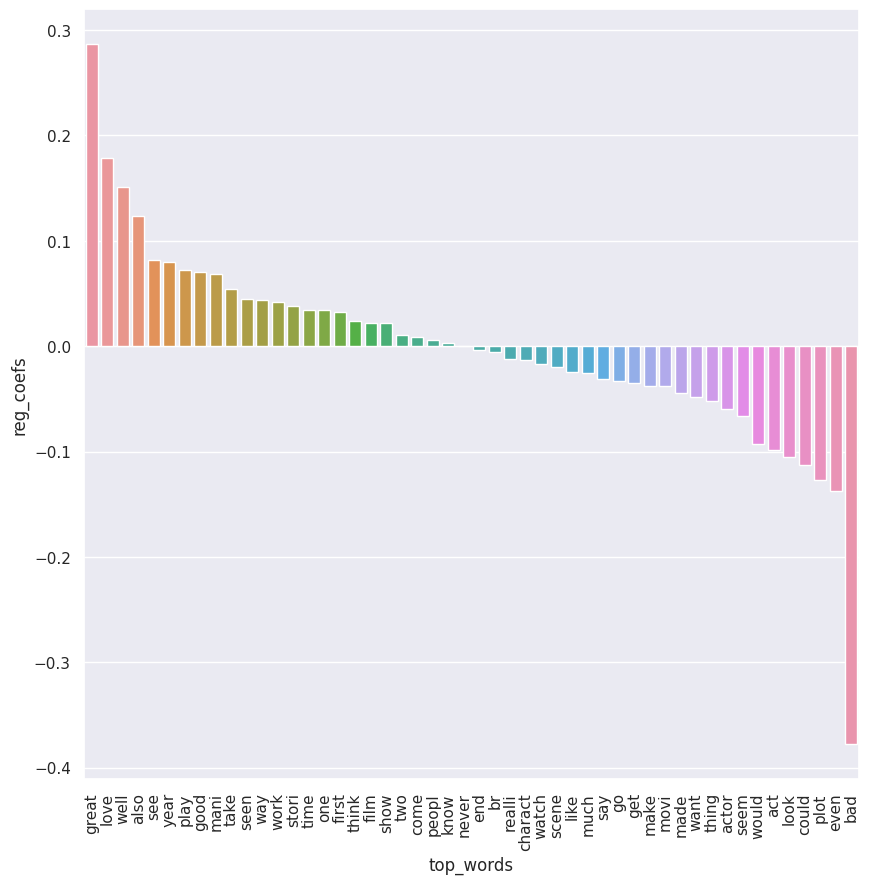

In [ ]:
import seaborn as sns
import matplotlib.pylab as plt

plt.figure(figsize=(10, 10))
ax=sns.barplot(data=df_sort, x="top_words", y="reg_coefs")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Выводы: Использование TfidfVectorizer в сочетании с логистической регрессией (без настройки гиперпараметров) показывает неплохую точность (71%) и может быть использована в качестве baseline для задач распознавания текста.

Наиболее редко встречаемые топ-слова, те что имеют отрицательные коэффициенты  отражают "смысл" всего датасета. То есть именно по таким словам как movi(movie без стемминга), actor, scene, act можно понять что речь в данном случае идет о фильмах.